In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path="/content/AB_NYC_2019.csv"
df= pd.read_csv(path)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#cleaning for regrssion,
#we wont need neighbourhood since we have latitide and long . we also dont need last_review. maybe availability_365  or not

#reviews_per_month   to fill in the nulls is either zero or check if the same host id has other properties with
# reviews per month.  abd fill nan. if not fill with zero

#convert neighbourhood_group and room_type to numbers

#use all algorithms on the price column

In [ ]:
#find the host ids for the host names that are null, cleaning
null_host_names = df[df["host_name"].isnull()]["host_id"]
null_host_names

df["host_name"].fillna(df["host_id"], inplace=True)


In [ ]:
df["reviews_per_month"]

0        0.21
1        0.38
2         NaN
3        4.64
4        0.10
         ... 
48890     NaN
48891     NaN
48892     NaN
48893     NaN
48894     NaN
Name: reviews_per_month, Length: 48895, dtype: float64

In [ ]:
# Condition 1: Fill null values with zero
df['reviews_per_month'].fillna(0, inplace=True)

# Condition 2: Calculate the mean reviews_per_month for each host_id where number_of_reviews > 0
mean_reviews_per_month = df[df['number_of_reviews'] > 0].groupby('host_id')['reviews_per_month'].mean()

# Condition 3: Update null values based on the mean for the same host_id, otherwise, fill with zero
df['reviews_per_month'] = df.apply(lambda row: mean_reviews_per_month[row['host_id']] if pd.isnull(row['reviews_per_month']) else row['reviews_per_month'], axis=1)


print(df[['host_id', 'number_of_reviews', 'reviews_per_month']].head(10))

   host_id  number_of_reviews  reviews_per_month
0     2787                  9               0.21
1     2845                 45               0.38
2     4632                  0               0.00
3     4869                270               4.64
4     7192                  9               0.10
5     7322                 74               0.59
6     7356                 49               0.40
7     8967                430               3.47
8     7490                118               0.99
9     7549                160               1.33


In [ ]:
#1) Calculate How many properties in each neighbourhood group

df["neighbourhood_group"].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

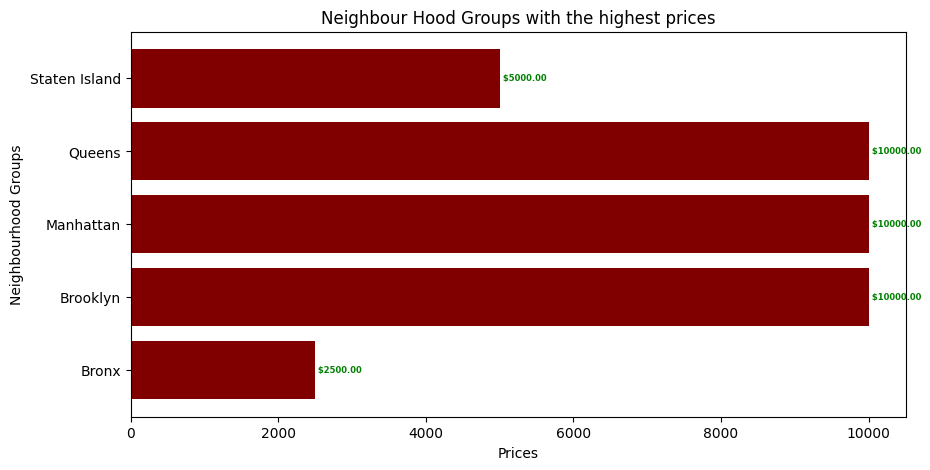

In [ ]:
#2) Which Neighbour Hood Group Has highest prices use bar chart to show this for all neighbourhood groups
maxprices= df.groupby("neighbourhood_group")["price"].max()
maxprices

plt.figure(figsize = (10, 5))
# color=[]
plt.barh(maxprices.index, maxprices.values, color ='maroon')
plt.ylabel("Neighbourhood Groups")
plt.xlabel("Prices")
plt.title("Neighbour Hood Groups with the highest prices")

for i, price in enumerate(maxprices.values):
    plt.text(price, i, f' ${price:.2f}', va='center', fontsize=6, color='green', fontweight='bold')
plt.show()

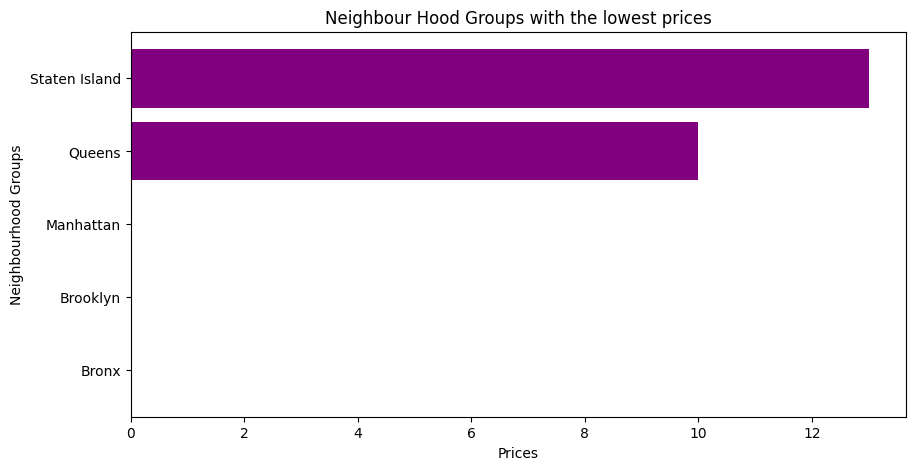

In [ ]:
#3) Which Neighbourhood group has lowest prices use bar chart to show this for all neighbourhood groups

minprices= df.groupby("neighbourhood_group")["price"].min()
minprices

plt.figure(figsize = (10, 5))

plt.barh(minprices.index, minprices.values, color="purple")
plt.ylabel("Neighbourhood Groups")
plt.xlabel("Prices")
plt.title("Neighbour Hood Groups with the lowest prices")
plt.show()
plt.show()

In [ ]:
#4) Highest and lowest price airbnb in each Neighbour Hood Group


df.groupby("neighbourhood_group")["price"].agg(max_price="max", min_price="min").reset_index()

,neighbourhood_group,max_price,min_price
0,Bronx,2500,0
1,Brooklyn,10000,0
2,Manhattan,10000,0
3,Queens,10000,10
4,Staten Island,5000,13


In [ ]:
#5) Which Host has highest count of properties

#have to replace null host names with the host ids
counts= df['host_id'].value_counts()
print(counts.head())
highest= df['host_id'].value_counts().idxmax()
print(highest)


219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
Name: host_id, dtype: int64
219517861


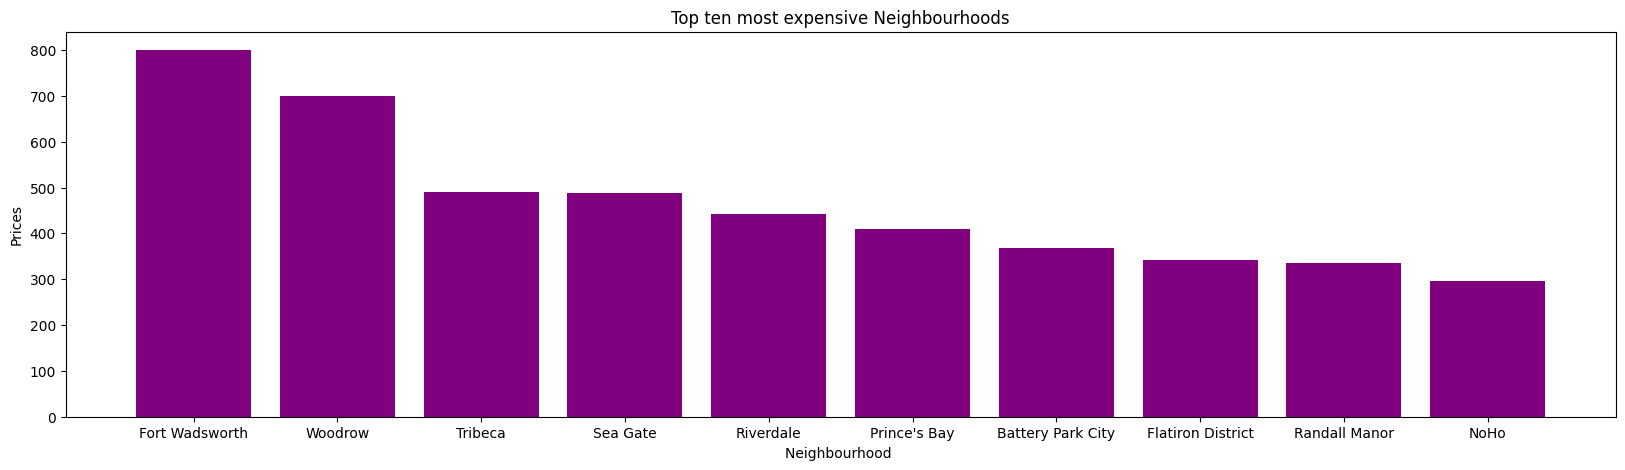

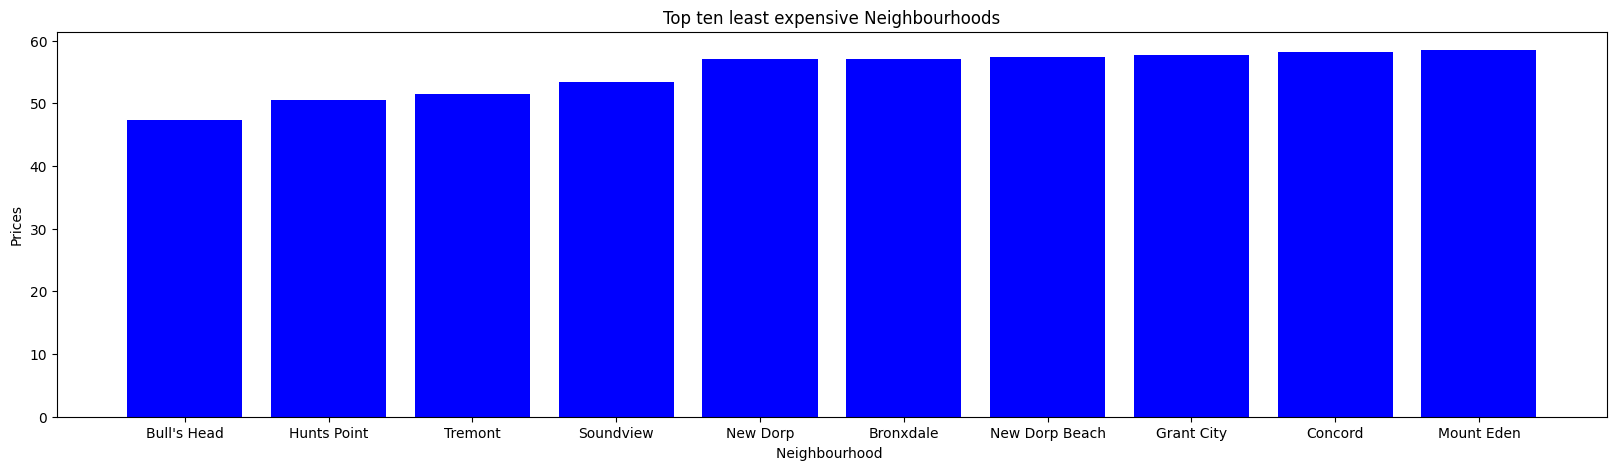

In [ ]:
#6) Which neighbourhood is most expensive and cheapest top 10 barchart
#find the average and make a chart per top ten cheap and top 10 expebsive

most = df.groupby("neighbourhood")["price"].mean()
most= most.sort_values(ascending=False)
top_10= most.head(10)
top_10



plt.figure(figsize = (20, 5))

plt.bar(top_10.index,top_10.values, color="purple")
plt.ylabel("Prices")
plt.xlabel("Neighbourhood ")
plt.title("Top ten most expensive Neighbourhoods")
plt.show()
plt.show()


least = df.groupby("neighbourhood")["price"].mean()
least= least.sort_values(ascending=True)
low_10= least.head(10)
low_10


plt.figure(figsize = (20, 5))

plt.bar(low_10.index,low_10.values, color="blue")
plt.ylabel("Prices")
plt.xlabel("Neighbourhood ")
plt.title("Top ten least expensive Neighbourhoods")
plt.show()
plt.show()




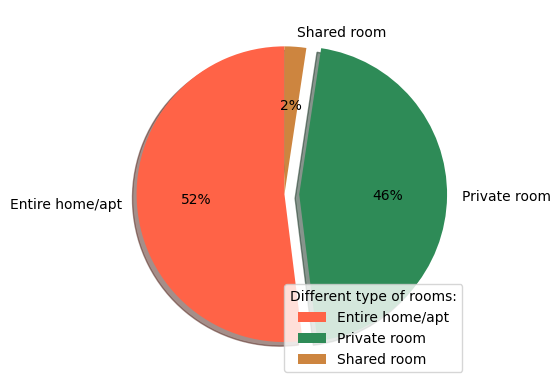

In [ ]:
#7) Count different type of room_type and do a pie chart showing % of each room type in overall dataset

rooms= df["room_type"].value_counts()
rooms
colors = ['tomato', 'seagreen', 'peru']
explode = (0,0.1, 0)
plt.pie(rooms.values, labels = rooms.index, autopct='%1.0f%%', explode =explode, colors=colors, shadow=True, startangle=90)
plt.legend(title = "Different type of rooms:")
plt.show()

In [ ]:
df


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,0.00,6,2


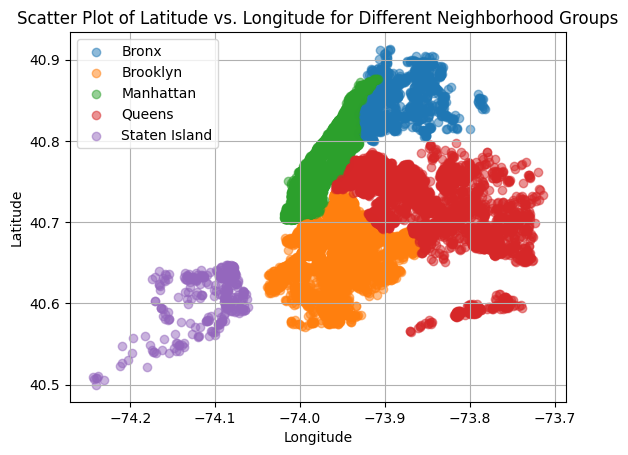

In [ ]:
#8) scatter plot between longitutude and latitude for different neighbourhood groups

import matplotlib.pyplot as plt

# Group the DataFrame by "neighbourhood_group"
grouped = df.groupby("neighbourhood_group")

# Create a scatter plot for each neighborhood group
for group_name, group_data in grouped:
    plt.scatter(group_data["longitude"], group_data["latitude"], label=group_name, alpha=0.5)

# Add labels and legend
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Scatter Plot of Latitude vs. Longitude for Different Neighborhood Groups")
plt.legend()
plt.grid(True)
plt.show()


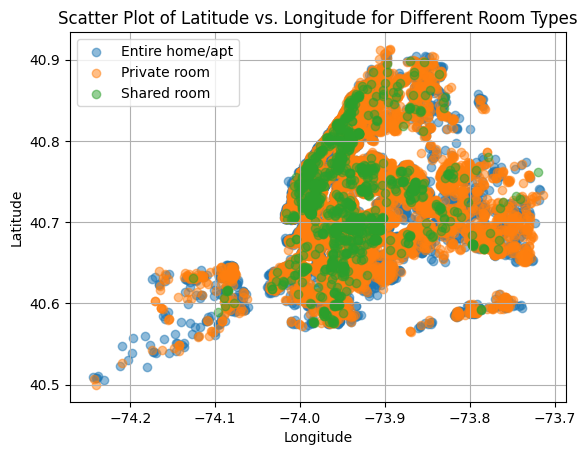

In [ ]:
#9) scatter plot between longitutude and latitude for different room_types

import matplotlib.pyplot as plt

# Group the DataFrame by "neighbourhood_group"
grouped2 = df.groupby("room_type")

# Create a scatter plot for each neighborhood group
for group_name2, group_data2 in grouped2:
    plt.scatter(group_data2["longitude"], group_data2["latitude"], label=group_name2, alpha=0.5)

# Add labels and legend
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Scatter Plot of Latitude vs. Longitude for Different Room Types")
plt.legend()
plt.grid(True)
plt.show()


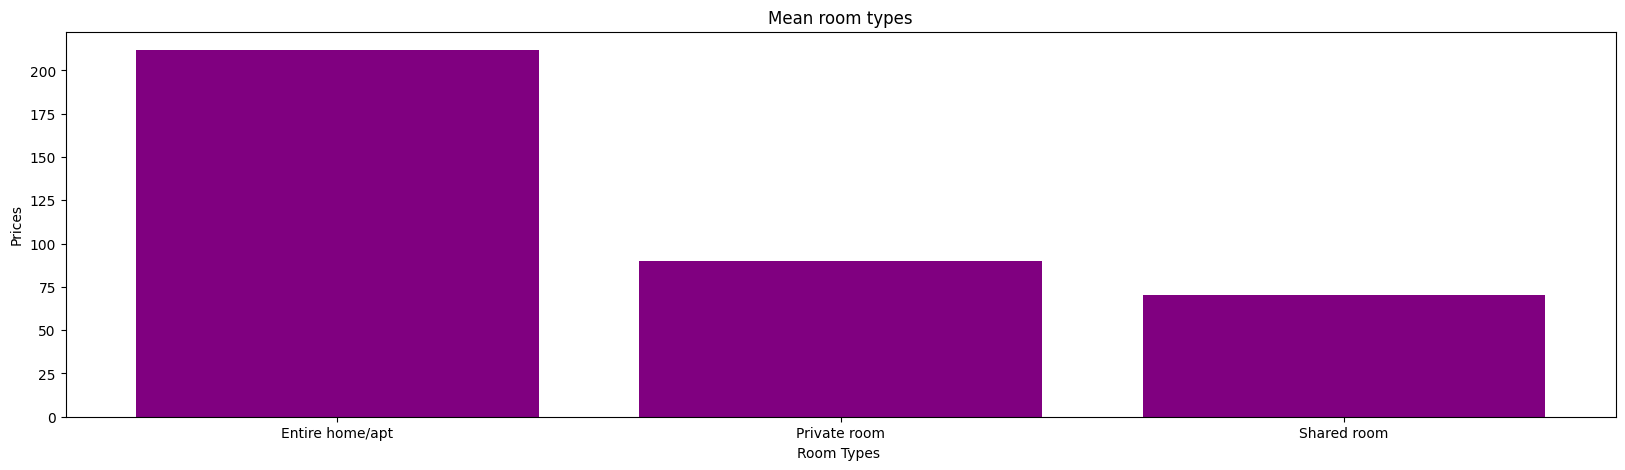

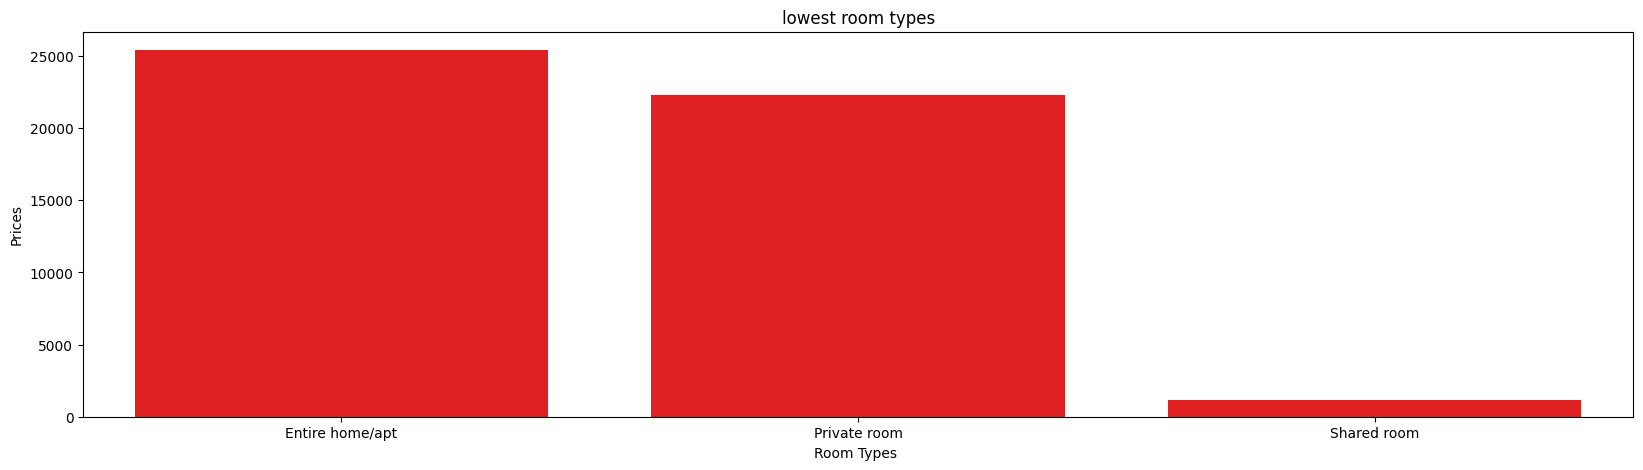

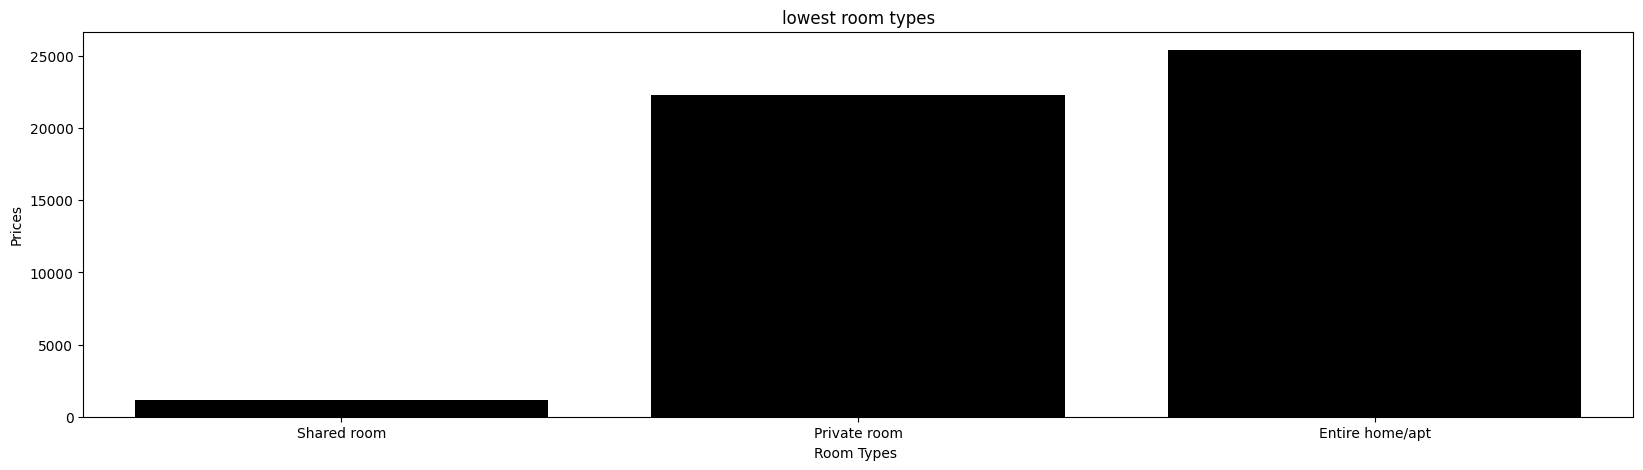

In [ ]:
#10. room_type vs price bar chart for the mean and highest and lowest

room= df["room_type"].idxmax
room

mean_room = df.groupby("room_type")["price"].mean()
most= df.groupby("room_type")["price"].count()
highest_room= most.sort_values(ascending=False)
lowest_room= most.sort_values(ascending=True)

plt.figure(figsize = (20, 5))

plt.bar(mean_room.index,mean_room.values,color="purple")
plt.ylabel("Prices")
plt.xlabel("Room Types ")
plt.title("Mean room types")
plt.show()
plt.show()




plt.figure(figsize = (20, 5))
sns.barplot(x= highest_room.index, y= highest_room.values,color="red")
plt.ylabel("Prices")
plt.xlabel("Room Types ")
plt.title("lowest room types")
plt.show()
plt.show()

plt.figure(figsize = (20, 5))
sns.barplot(x= lowest_room.index, y= lowest_room.values,color="black")
plt.ylabel("Prices")
plt.xlabel("Room Types ")
plt.title("lowest room types")
plt.show()
plt.show()



In [ ]:
#11. Do a similar plot to this

# counts of roomtypes per neighnborhoods


neigh=df.groupby("room_type")["neighbourhood_group"].value_counts()

neigh




room_type        neighbourhood_group
Entire home/apt  Manhattan              13199
                 Brooklyn                9559
                 Queens                  2096
                 Bronx                    379
                 Staten Island            176
Private room     Brooklyn               10132
                 Manhattan               7982
                 Queens                  3372
                 Bronx                    652
                 Staten Island            188
Shared room      Manhattan                480
                 Brooklyn                 413
                 Queens                   198
                 Bronx                     60
                 Staten Island              9
Name: neighbourhood_group, dtype: int64

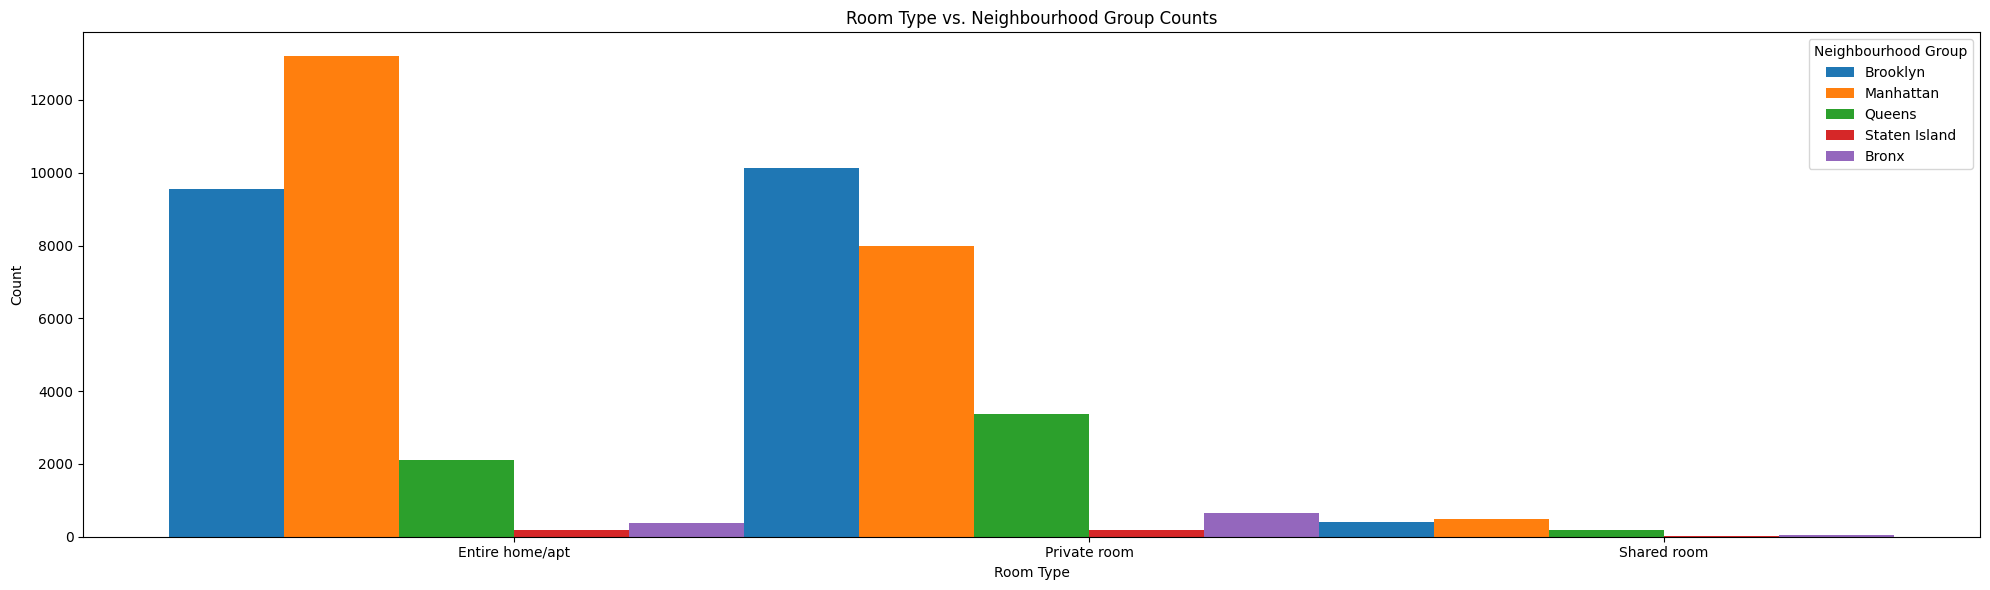

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Group the DataFrame by "room_type" and "neighbourhood_group" and calculate counts
neigh = df.groupby(["room_type", "neighbourhood_group"]).size().unstack(fill_value=0)

# Set the figure size
plt.figure(figsize=(20, 6))

# Extract the unique "neighbourhood_group" values
neighbourhood_groups = df["neighbourhood_group"].unique()

# Create bar chart for each "neighbourhood_group" within each "room_type"
width = 0.2
x = np.arange(len(neigh.index))

for i, neighbourhood_group in enumerate(neighbourhood_groups):
    plt.bar(
        x + i * width ,
        neigh[neighbourhood_group],
        width=width,
        label=neighbourhood_group,

    )

# Add labels and title
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.title("Room Type vs. Neighbourhood Group Counts")
plt.xticks(x + width * (len(neighbourhood_groups) / 2), neigh.index)

# Add legend
plt.legend(title="Neighbourhood Group")

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,0.00,6,2


In [ ]:
X= df[["neighbourhood_group","latitude", "longitude", "room_type", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count"]].values
X

y= df["price"].values
y

array([149, 225, 150, ..., 115,  55,  90])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
from sklearn.model_selection import train_test_split #training is teaching the algorithm what kind of data will come
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train, X_test, y_train, y_test

(array([[0.0, 0.0, 1.0, ..., 27, 0.46, 1],
        [1.0, 0.0, 0.0, ..., 9, 1.19, 2],
        [0.0, 0.0, 1.0, ..., 28, 0.82, 1],
        ...,
        [0.0, 0.0, 1.0, ..., 14, 3.72, 2],
        [0.0, 1.0, 0.0, ..., 4, 4.0, 1],
        [0.0, 0.0, 1.0, ..., 201, 2.84, 1]], dtype=object),
 array([[0.0, 0.0, 1.0, ..., 0, 0.0, 1],
        [0.0, 0.0, 1.0, ..., 5, 0.4, 1],
        [0.0, 1.0, 0.0, ..., 5, 0.35, 3],
        ...,
        [0.0, 1.0, 0.0, ..., 0, 0.0, 1],
        [0.0, 1.0, 0.0, ..., 32, 0.75, 13],
        [0.0, 1.0, 0.0, ..., 1, 0.04, 3]], dtype=object),
 array([ 80,  60,  98, ...,  73, 134, 179]),
 array([225, 649, 300, ..., 150, 149, 169]))

In [ ]:
from sklearn.preprocessing import StandardScaler #trying to apply changes on existing data
sc= StandardScaler()
X_train[:, :19] = sc.fit_transform(X_train[:, :19] )
X_test[:, :19]= sc.transform(X_test[:, :19])

In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression

reg= LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predicted linear regession
y_pred= reg.predict(X_test) #these are the predicted prices of the airbnbs

y_pred


array([266.79165566, 257.2395953 , 176.97466946, ...,  75.81509316,
        61.44825467, 182.57595374])

In [ ]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)
reg_2 = LinearRegression()
reg_2.fit(X_train_poly , y_train)

LinearRegression()

In [ ]:
#prediction from polynomial
y_pred_poly= reg_2.predict(X_test_poly) #these are the predicted prices of the airbnbs

y_pred_poly

array([350.44905722, 271.96352065, 260.32639468, ...,  68.94899333,
       114.34763181, 313.88691652])

In [ ]:
#DecisionTree regression
from sklearn.tree import DecisionTreeRegressor
reg3 = DecisionTreeRegressor(random_state = 0)
reg3.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
#prediction from DecisionTree
tree_y=reg3.predict(X_test)
tree_y

array([300., 300., 285., ...,  50., 189., 264.])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg4 = RandomForestRegressor(n_estimators = 10, random_state = 0)
reg4.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
forrest_y=reg4.predict(X_test)
forrest_y

array([549.5, 529.5, 277.3, ..., 345.5, 154.5, 230.2])

In [ ]:
#Support vector Regression
from sklearn.svm import SVR
reg5 = SVR(kernel = 'rbf')
reg5.fit(X_train, y_train)

SVR()

In [ ]:
svr_y=reg5.predict(X_test)
svr_y

array([204.86170489, 203.23101356, 156.40627089, ...,  60.82096245,
        76.74161617, 158.88996053])

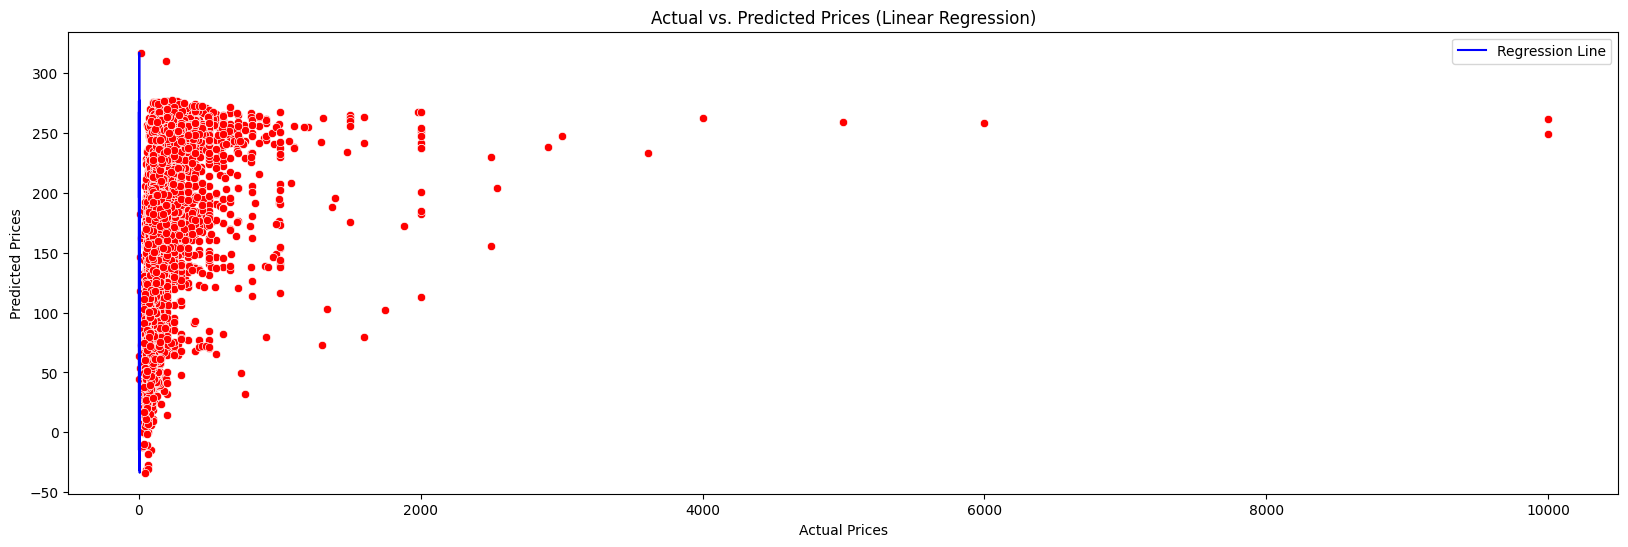

In [ ]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x=y_test, y=y_pred, color='red')  # Note the x and y arguments
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices (Linear Regression)")
x_range = np.linspace(min(X_test[:, 0]), max(X_test[:, 0]), len(X_test))
sns.lineplot(x=x_range, y=reg.predict(X_test), color='blue', label='Regression Line')
plt.legend()
plt.show()

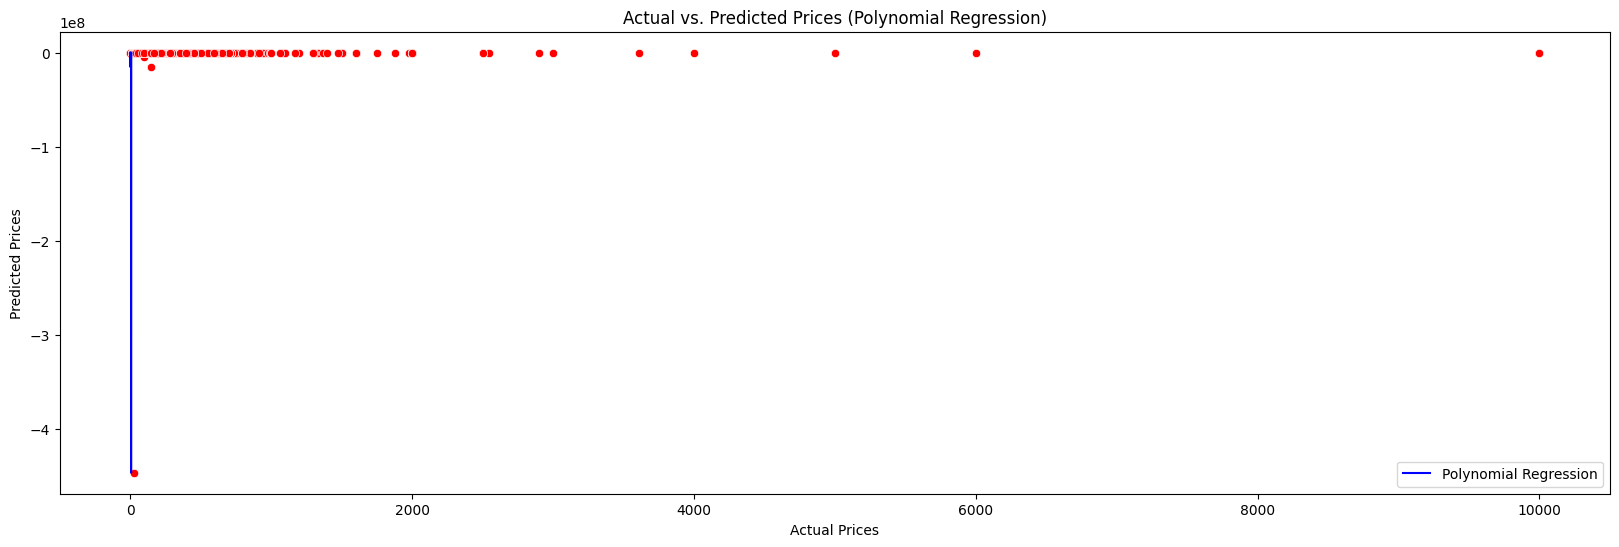

In [ ]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x=y_test, y=y_pred_poly, color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices (Polynomial Regression)")
# Set the x-axis range for the Seaborn line plot
x_range_poly = np.linspace(min(X_test[:, 0]), max(X_test[:, 0]), len(X_test))

# Create a Seaborn line plot with the specified x-axis range
sns.lineplot(x=x_range_poly, y=reg_2.predict(poly_reg.transform(X_test)), color='blue', label='Polynomial Regression')

plt.legend()
plt.show()

Text(0, 0.5, 'Predicted Prices')

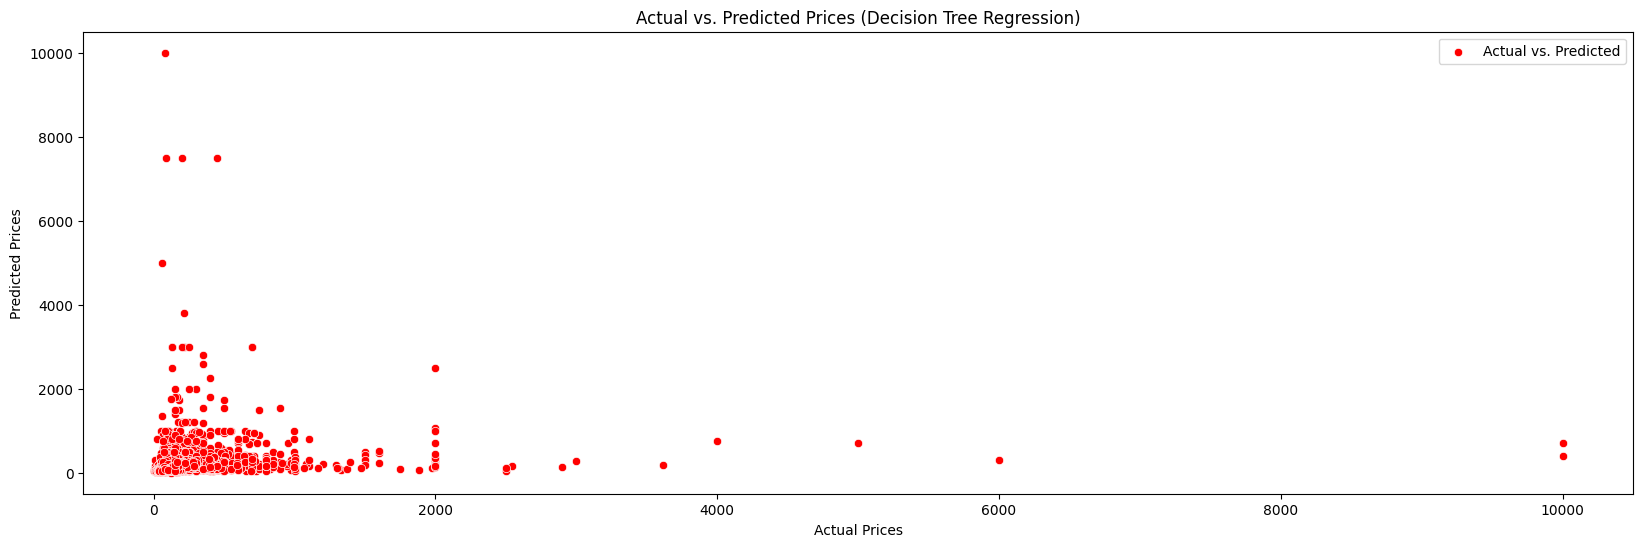

In [ ]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x=y_test, y=tree_y, color='red', label='Actual vs. Predicted')
plt.title('Actual vs. Predicted Prices (Decision Tree Regression)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')


Text(0, 0.5, 'Predicted Prices')

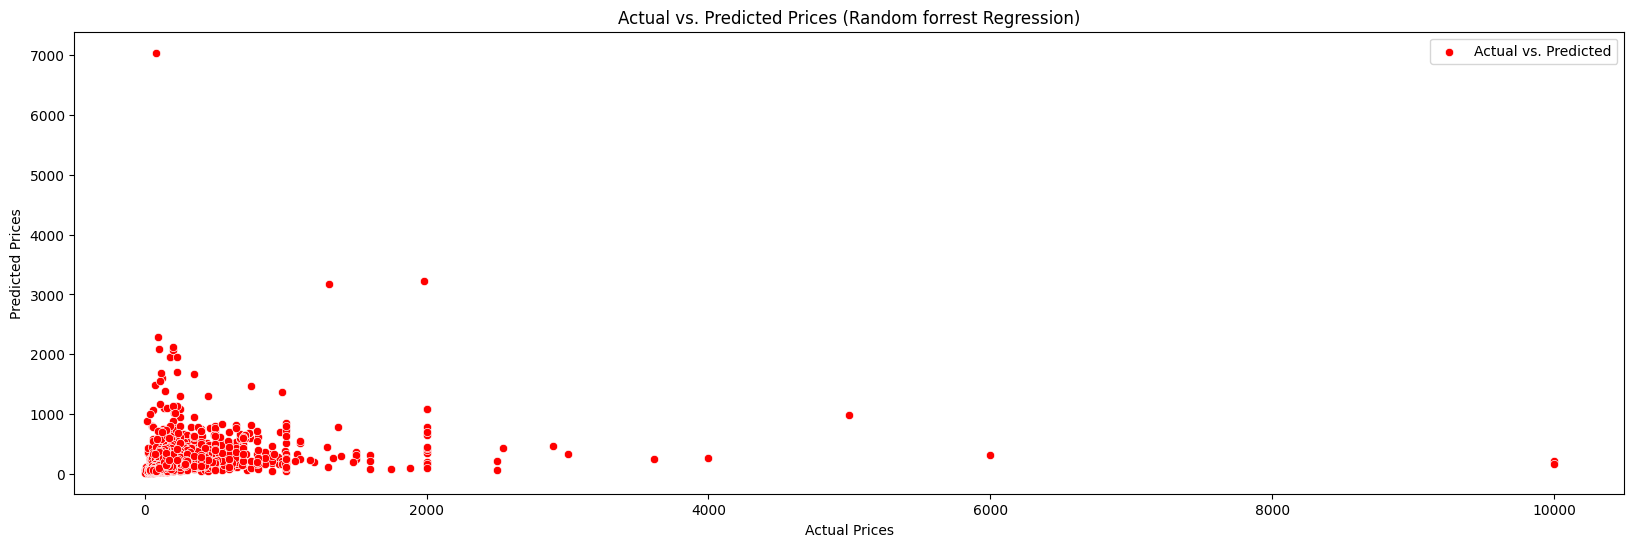

In [ ]:
#random forrest
plt.figure(figsize=(20, 6))
sns.scatterplot(x=y_test, y=forrest_y, color='red', label='Actual vs. Predicted')
plt.title('Actual vs. Predicted Prices (Random forrest Regression)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')


Text(0, 0.5, 'Predicted Prices')

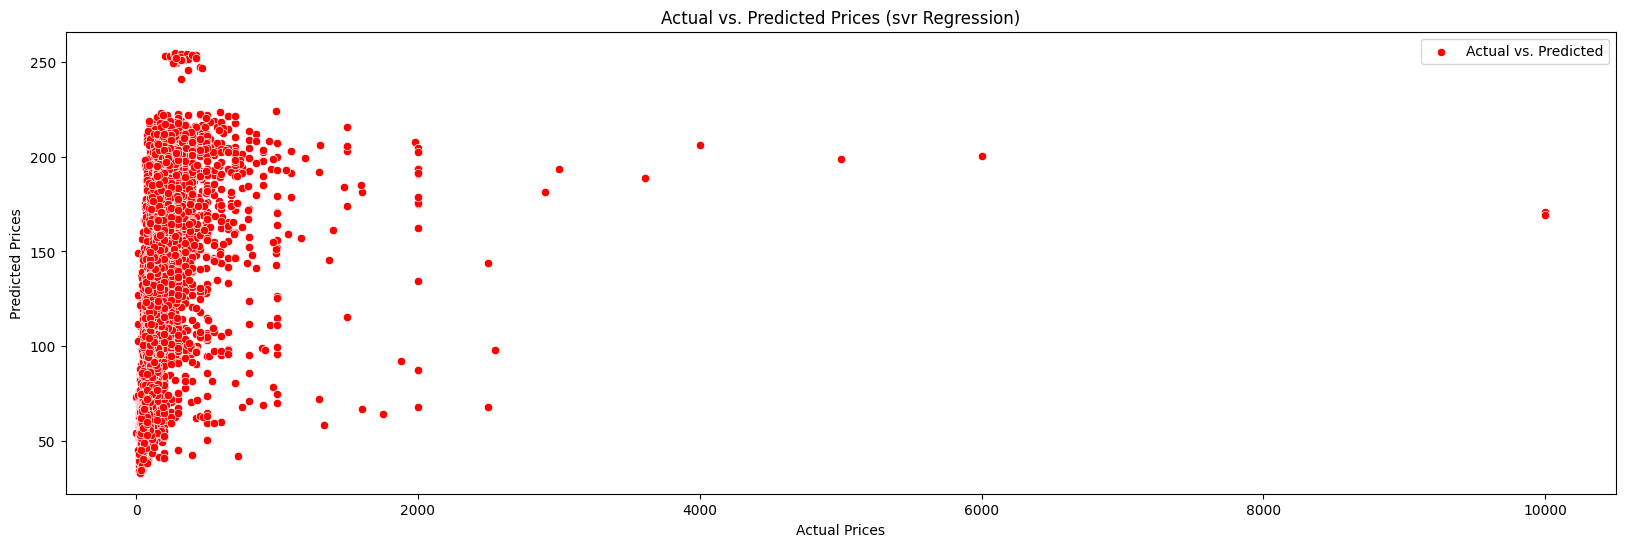

In [ ]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x=y_test, y=svr_y, color='red', label='Actual vs. Predicted')
plt.title('Actual vs. Predicted Prices (svr Regression)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')


In [ ]:
y_test

array([225, 649, 300, ..., 150, 149, 169])

In [ ]:
reg.coef_

array([ 5.86290391e+13,  1.96198082e+14,  1.98222768e+14,  1.27664384e+14,
        3.48587552e+13,  1.14222363e+14,  1.13888752e+14,  3.46639839e+13,
       -1.33750000e+01, -1.90312500e+01,  3.16015625e+00, -7.08496094e+00,
       -2.46875000e+00,  2.92968750e-01])

In [ ]:
#model accuracy of the regression model
from sklearn.metrics import r2_score
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 10.12


In [ ]:
#model accuracy of the polynomial regression model
from sklearn.metrics import r2_score
Accuracy=r2_score(y_test,y_pred_poly)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is -37064219285.38


In [ ]:
#model accuracy of the decisiontree  model
from sklearn.metrics import r2_score
Accuracy=r2_score(y_test,tree_y)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is -71.03


In [ ]:
#model accuracy of the randomforrest  model
from sklearn.metrics import r2_score
Accuracy=r2_score(y_test,forrest_y)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is -6.26


In [ ]:
from sklearn.metrics import r2_score
Accuracy=r2_score(y_test,svr_y)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 7.33
